# Exploração do orçamento da ação 218X - Garantia da Lei e da Ordem

In [1]:
import pandas as pd
import utils as xu
import sigabrasil as sb

from importlib import reload

In [2]:
def etl_glo_sibrabrasil(siga_file_pattern, ipca_file):
    """
    Load and filter data about environmental GLO ops.
    from SIGA Brasil XLS files.
    """
    
    wrong_ops = ['OPERACAO BRICS 2019', 'OPERACAO CERBERO', 'OPERACAO MANDACARU']

    glo = sb.etl_sigabrasil(siga_file_pattern, ipca_file)
    glo = sb.remove_unwanted_siga_data(glo)
    glo = glo.loc[~glo['PO DESP'].isin(wrong_ops)]
    glo = glo.loc[~glo['PI DESP'].str.contains('TRANCA FORTE', case=False)]
    
    return glo

In [3]:
glo = etl_glo_sibrabrasil('../dados/brutos/orcamento/sigabrasil/orcamento_GLO_acao-218X_*.xls', '../dados/aux/ipca_ateh_2021-05-01.csv')

Loading data from local file...
Last IPCA date:  2021-05-01


**Operações de GLO**
* A Operação **Cérbero** é uma missão de GLO (Decreto Presidencial Nº 10.233/2020, de 6 de fevereiro de 2020) que, coordenada pelo CMP e executada pela FORPLAN, vem, há quase três meses, ampliando a capacidade de segurança na Penitenciária Federal de Brasília (PFBRA) (<http://www.bpeb.eb.mil.br/index.php/component/content/article/35-atividades-batalhao/608-operacao-cerbero>).
* A Operação de Garantia da Lei e da Ordem (GLO) **BRICS 2019**, com o objetivo de garantir a segurança das autoridades que participarão da Reunião da XI Cúpula dos BRICS (<https://www.defesanet.com.br/brics/noticia/34868/Operacao-de-GLO-para-XI-Cupula-dos-BRICS/>)
* A operação **Mandacaru** tem por finalidade a preservação da ordem pública e a incolumidade das pessoas e do patrimônio, contribuindo para o restabelecimento das condições de normalidade no Estado do Ceará, com foco no município de Fortaleza (<https://www.25bc.eb.mil.br/index.php?option=com_content&view=article&id=760:operacao-mandacaru&catid=17&Itemid=265>)
* A operação **Tranca Forte** está relacionada à transferência de presos ligados à facção criminosa Primeiro Comando da Capital (PCC) (<http://www.2de.eb.mil.br/index.php/operacao-tranca-forte-2019>).

**Notícias**
* Muito gasto para pouca efetividade: <https://brasil.elpais.com/brasil/2020-05-26/exercito-vai-gastar-em-um-mes-de-acao-na-amazonia-o-orcamento-anual-do-ibama-para-fiscalizacao.html>
* Desvios de finalidade dos gastos com GLOs: <https://piaui.folha.uol.com.br/388206-2/>

**Outras informações**

* Segundo XXXXXXXXXXXXXX (da SOF - Secretaria de Orçamento e Finanças, ver zap), a Op. Verde Brasil 1 gastou R$ 133,5 milhões.

In [4]:
# Programas orçamentários que mais gastaram 
display(sb.count_by_category(glo, 'PO DESP'))
# Programas orçamentários que mais gastaram 
display(sb.count_by_category(glo.loc[glo['Ano'] == 2019], 'PO DESP'))


,n_registros,valor_realizado
PO DESP,,
OPERACAO VERDE BRASIL 2,2916,3.857330e+08
OPERACOES DE GARANTIA DA LEI E DA ORDEM - DESPESAS DIVERSAS,1768,1.396671e+08
OPERACAO VERDE BRASIL 2 - REGRA DE OURO,310,3.691982e+06
OPERACOES DE GARANTIA DA LEI E DA ORDEM,9,1.222545e+05


,n_registros,valor_realizado
PO DESP,,
OPERACOES DE GARANTIA DA LEI E DA ORDEM - DESPESAS DIVERSAS,1768,1.396671e+08


In [5]:
display(sb.count_by_category(glo, 'PI DESP'))

,n_registros,valor_realizado
PI DESP,,
OP GLO VERDE BRASIL 2,2490,2.163258e+08
GESTAO DE REC COLOG OP VERDE BRASIL 2.,215,7.243294e+07
GLO VERDE BRASIL,85,6.328167e+07
OPERACAO GLO VERDE BRASIL 2,124,5.529387e+07
GESTAO DE RECURSOS PELO COLOG PARA EMPREGO NA,92,3.639303e+07
GESTAO DE REC COLOG EMPR OP GLO VERDE BRA 2,8,2.093756e+07
OP GLO VERDE BRASIL,1146,1.828436e+07
OPERACAO GLO VERDE BRASIL,209,1.818127e+07
OPERACAO VERDE BRASIL 2,1,8.325436e+06


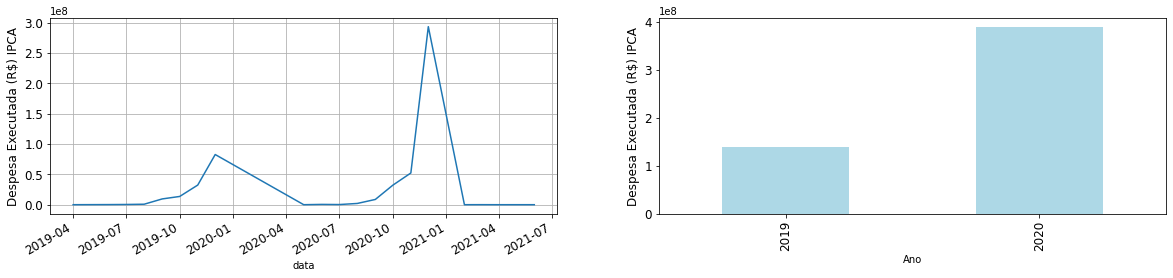

In [5]:
sb.plot_expenditure(glo)